# Binary Classification in PyCaret - Stroke Prevention

In this dataset, we have factors that could be linked to the likelihood of having a stroke. First, we'll investigate some descriptive statistics organised by gender, probe for missing values, encode categorical variables, and then see if we can find strong predictors of having a stroke. This dataset can be found here: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Attribute Information
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Import the necessary libraries for data inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
train = pd.read_csv('train_2v.csv')

In [3]:
test = pd.read_csv('test_2v.csv')

Combine the test and train datasets briefly for inspection.

In [4]:
data = train.append(test)

Inspect columns

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0.0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0.0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0.0


List number of unique ID's.

In [6]:
data.id.nunique()

62001

Count the number of null ID values.

In [7]:
data.id.isnull().value_counts()

False    62001
Name: id, dtype: int64

List the number of gender categories.

In [8]:
data.gender.nunique()

3

Count number of null values in gender.

In [9]:
data.gender.isnull().value_counts()

False    62001
Name: gender, dtype: int64

Plot the gender categories as bar charts.

<AxesSubplot:xlabel='gender', ylabel='count'>

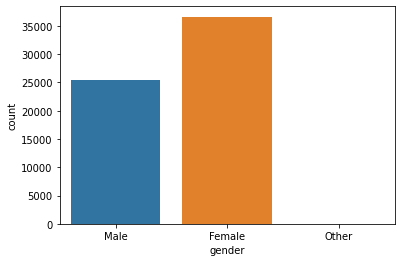

In [10]:
sns.countplot(x='gender',data=data)

Group ID by gender.

In [11]:
gender_count = data.groupby(by='gender', as_index=False).agg({'id': pd.Series.nunique})

In [12]:
gender_count

,gender,id
0,Female,36622
1,Male,25366
2,Other,13


List the number of unique ages.

In [13]:
data.age.nunique()

104

Create a histogram of ages.

<AxesSubplot:xlabel='age', ylabel='Count'>

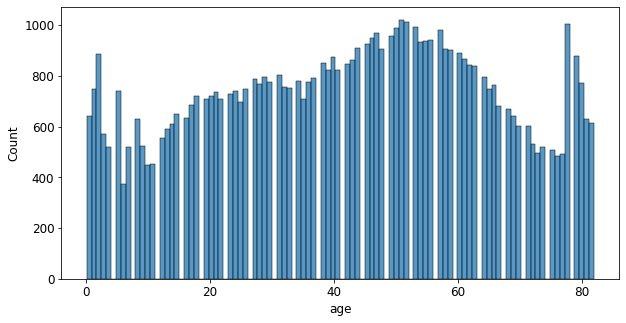

In [14]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 12})
sns.histplot(x='age',bins=104,data=data)

List the number of unique hypertension categories. There should only be two. 0 indicating no hypertension and 1 indicating the presence of hypertension.

In [15]:
data.hypertension.nunique()

2

In [16]:
hypertension_count = data.groupby(by='hypertension', as_index=False).agg({'id': pd.Series.nunique})
hypertension_count

,hypertension,id
0,0,56207
1,1,5794


Plot the presence of hypertension by gender.

<AxesSubplot:xlabel='hypertension', ylabel='count'>

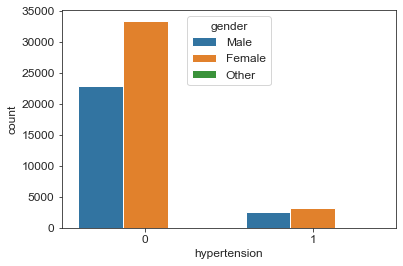

In [17]:
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.countplot(x='hypertension',hue='gender',data=data)

In [18]:
heart_disease_count = data.groupby(by='heart_disease', as_index=False).agg({'id': pd.Series.nunique})
heart_disease_count

,heart_disease,id
0,0,59045
1,1,2956


Plot the presence of heart disease by gender. 0 indicates no heart disease while 1 indicates heart disease.

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

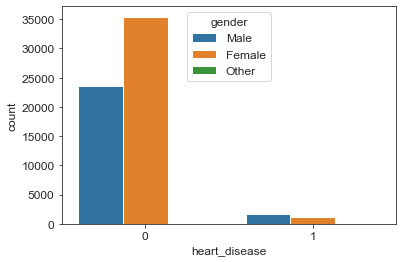

In [19]:
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.countplot(x='heart_disease',hue='gender',data=data)

In [20]:
ever_married_count = data.groupby(by='ever_married', as_index=False).agg({'id': pd.Series.nunique})
ever_married_count

,ever_married,id
0,No,22124
1,Yes,39877


Plot marital status ('ever_married') by gender.

<AxesSubplot:xlabel='ever_married', ylabel='count'>

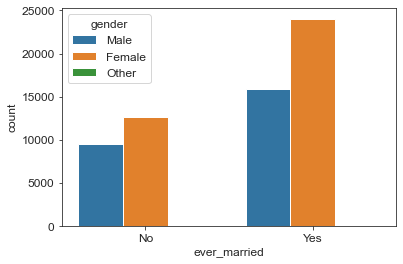

In [21]:
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.countplot(x='ever_married',hue='gender',data=data)

In [22]:
work_type_count = data.groupby(by='work_type', as_index=False).agg({'id': pd.Series.nunique})
work_type_count

,work_type,id
0,Govt_job,7742
1,Never_worked,252
2,Private,35584
3,Self-employed,9654
4,children,8769


Plot type of work by gender.

<AxesSubplot:xlabel='work_type', ylabel='count'>

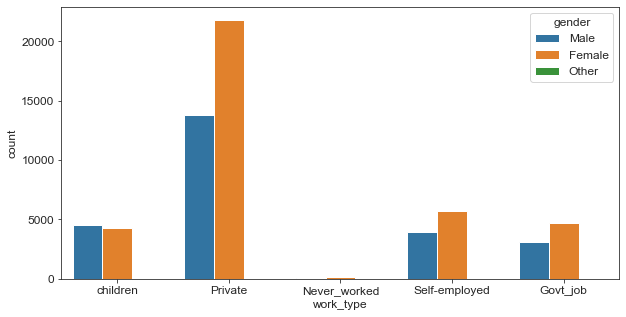

In [23]:
plt.figure(figsize=(10,5))
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.countplot(x='work_type',hue='gender',data=data)

Group ID's by Residence_type.

In [24]:
Residence_type_count = data.groupby(by='Residence_type', as_index=False).agg({'id': pd.Series.nunique})
Residence_type_count

,Residence_type,id
0,Rural,30935
1,Urban,31066


Plot a histogram for avg_glucose_level by gender.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

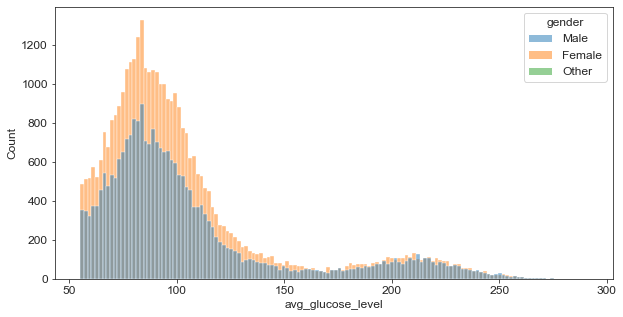

In [25]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 12})
sns.histplot(x='avg_glucose_level',hue='gender',data=data)

Plot a histogram for BMI by gender.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

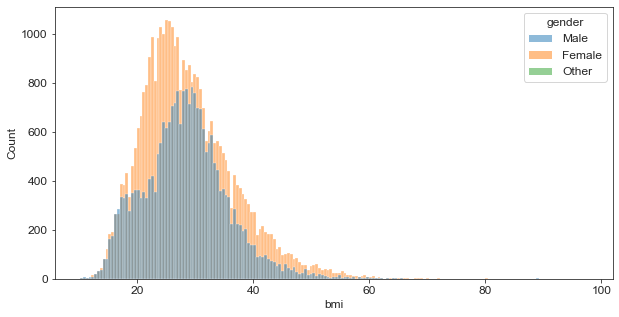

In [26]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 12})
sns.histplot(x='bmi',hue='gender',data=data)

Group ID's by smoking_status.

In [27]:
smoking_status_count = data.groupby(by='smoking_status', as_index=False).agg({'id': pd.Series.nunique})
smoking_status_count

,smoking_status,id
0,formerly smoked,10753
1,never smoked,22886
2,smokes,9319


Group ID's by stroke_count.

In [28]:
stroke_count = data.groupby(by='stroke', as_index=False).agg({'id': pd.Series.nunique})
stroke_count

,stroke,id
0,0.0,42617
1,1.0,783


Drop the ID column cause we don't need ID as a predictor for our models.

In [29]:
data = data.drop(data.columns[0], axis=1)

Drop nan values in dataset.

In [30]:
data = data.dropna()

Convert the stroke value to an integer so that it can work as a label to be predicted.

In [31]:
data['stroke'] = data['stroke'].apply(np.int64)

In [32]:
dataset = data

In [33]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [34]:
dataset.shape

(29072, 11)

** The commentary for the following portion using PyCaret for machine learning has been adapted from the PyCaret tutorial page for binary classification. Some comments have been shortened for clarity but full details can be found here: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

In order to demonstrate the predict_model() function on unseen data, a sample of records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these records are not available at the time when the machine learning experiment was performed.

In [35]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (27618, 11)
Unseen Data For Predictions: (1454, 11)


The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [36]:
from pycaret.classification import *

In [37]:
exp_clf101 = setup(data = data, target = 'stroke', session_id=123)

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(27618, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [38]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9814,0.8330,0.0000,0.0000,0.0000,0.0000,0.0000,0.7540
ridge,Ridge Classifier,0.9814,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0220
ada,Ada Boost Classifier,0.9814,0.8200,0.0000,0.0000,0.0000,0.0000,0.0000,0.1910
rf,Random Forest Classifier,0.9813,0.7341,0.0028,0.1000,0.0054,0.0049,0.0155,0.3610
knn,K Neighbors Classifier,0.9811,0.5591,0.0000,0.0000,0.0000,-0.0006,-0.0017,0.0940
lightgbm,Light Gradient Boosting Machine,0.9811,0.7923,0.0000,0.0000,0.0000,-0.0006,-0.0015,0.0880
catboost,CatBoost Classifier,0.9810,0.7811,0.0000,0.0000,0.0000,-0.0009,-0.0024,6.8700
xgboost,Extreme Gradient Boosting,0.9808,0.7696,0.0000,0.0000,0.0000,-0.0013,-0.0029,0.6740
gbc,Gradient Boosting Classifier,0.9806,0.8240,0.0028,0.0200,0.0049,0.0032,0.0039,0.5390
svm,SVM - Linear Kernel,0.9803,0.0000,0.0056,0.0080,0.0066,0.0051,0.0052,0.0850


We can see from the above that logistic regression appeared to be the strongest model for classification of stroke. 

Two simple words of code (not even a line) have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter. For example compare_models(sort = 'Recall') will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using n_select parameter.

In [39]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Let's view the models available in the PyCaret library.

In [40]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Create a logistic regression classifier.

In [41]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9814,0.8370,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9814,0.8072,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9819,0.8411,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9814,0.8258,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9814,0.8063,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9814,0.8455,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9814,0.8722,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9814,0.8390,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9814,0.8539,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9814,0.8020,0.0000,0.0000,0.0000,0.0000,0.0000


Tune the model. By default, tune_model optimizes Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in the highest AUC instead of Accuracy. For the purposes of this example, we have used the default metric Accuracy only for the sake of simplicity. Generally, when the dataset is imbalanced (such as the stroke dataset we are working with) Accuracy is not a good metric for consideration.

In [42]:
tuned_lr = tune_model(lr, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7347,0.8378,0.7778,0.0525,0.0984,0.0658,0.1548
1,0.7337,0.8060,0.6389,0.0438,0.0820,0.0489,0.1138
2,0.7429,0.8427,0.8000,0.0541,0.1013,0.0697,0.1631
3,0.7268,0.8249,0.7500,0.0495,0.0928,0.0599,0.1431
4,0.7212,0.8061,0.7500,0.0485,0.0911,0.0581,0.1405
5,0.7248,0.8455,0.8056,0.0523,0.0983,0.0656,0.1581
6,0.7398,0.8698,0.8333,0.0569,0.1066,0.0743,0.1735
7,0.7465,0.8421,0.8056,0.0566,0.1058,0.0736,0.1688
8,0.7268,0.8525,0.8611,0.0560,0.1051,0.0727,0.1750
9,0.7181,0.8062,0.7778,0.0496,0.0932,0.0603,0.1470


Let's look at the version tuned for better AUC results.

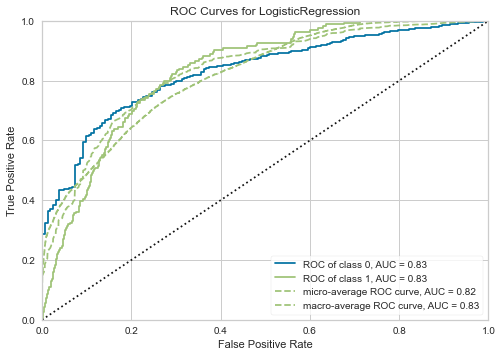

In [43]:
plot_model(tuned_lr, plot = 'auc')

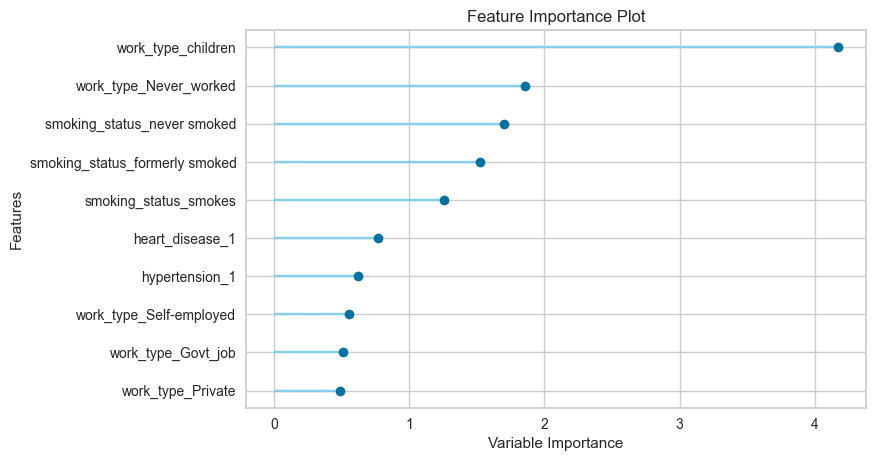

In [44]:
plot_model(tuned_lr, plot='feature')

Judging by the feature importance, it would appear that work type is a significant feature in whether or not someone has had a stroke.

<AxesSubplot:xlabel='stroke', ylabel='work_type'>

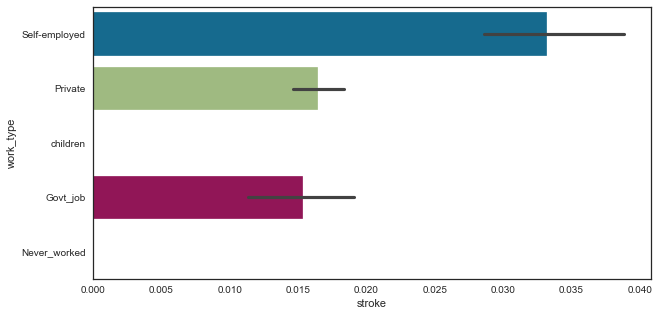

In [45]:
plt.figure(figsize=(10,5))
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.barplot(x='stroke',y='work_type',data=data)

As shown above, if we break this relationship down further we can see that being self-employed, working in the private sector, and working goverment jobs are all associated with heightened stroke risk.

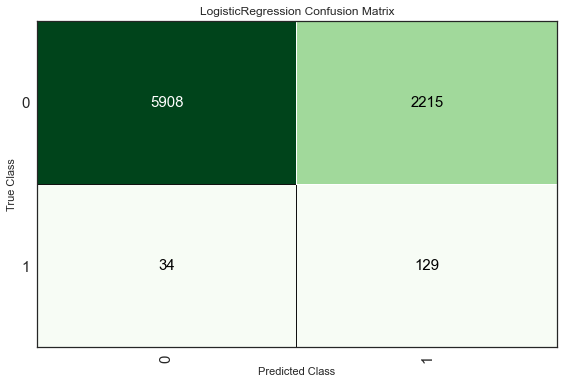

In [46]:
plot_model(tuned_lr, plot = 'confusion_matrix')

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. Now, using our final trained model stored in the tuned_lr variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [47]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7286,0.8305,0.7914,0.0550,0.1029,0.0687,0.1599


Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [48]:
final_lr = finalize_model(tuned_lr)

In [49]:
print(final_lr)

LogisticRegression(C=5.56, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=123, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)


Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_lr under predict_model() to compare the information grid with the one above in section 11.

In [50]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7293,0.8355,0.8037,0.0559,0.1046,0.0704,0.1639


Notice how the AUC in final_lr has increased, even though the model is the same. This is because the final_lr variable has been trained on the complete dataset including the test/hold-out set.

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret.

In [51]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Label,Score
0,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,1,0.8614
1,Male,46.0,0,0,Yes,Self-employed,Rural,88.19,29.3,formerly smoked,0,0,0.7985
2,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0,1,0.9209
3,Female,60.0,0,0,Yes,Private,Rural,66.42,23.6,never smoked,0,0,0.6215
4,Male,38.0,0,0,No,Self-employed,Urban,74.09,39.6,never smoked,0,0,0.8849


The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column default available. To do that we will use pycaret.utils module. See example below:

In [52]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['stroke'], unseen_predictions['Label'], metric = 'AUC')

0.7596

We have now finished the experiment by finalizing the tuned_lr model which is now stored in final_lr variable. We have also used the model stored in final_lr to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [53]:
save_model(final_lr,'Final LR Model 10May2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=5.56, class_weight='balanced', dual=False,
          

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [54]:
saved_final_lr = load_model('Final LR Model 10May2021')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen that we used in section 13 above.

In [55]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

In [56]:
new_prediction.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Label,Score
0,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,1,0.8614
1,Male,46.0,0,0,Yes,Self-employed,Rural,88.19,29.3,formerly smoked,0,0,0.7985
2,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0,1,0.9209
3,Female,60.0,0,0,Yes,Private,Rural,66.42,23.6,never smoked,0,0,0.6215
4,Male,38.0,0,0,No,Self-employed,Urban,74.09,39.6,never smoked,0,0,0.8849


Notice that the results of unseen_predictions and new_prediction are identical.

In [57]:
from pycaret.utils import check_metric
check_metric(new_prediction['stroke'], new_prediction['Label'], metric = 'AUC')

0.7596